![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Pesquisa Operacional

## Análise de Sensibilidade

- Professor: Felipe Reis


---
### Importação de bibliotecas 

In [1]:
#instalação pulp
!pip install pulp

In [2]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
%matplotlib inline

In [3]:
import matplotlib        as mpl
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

def plot_raizes(list_obj, list_par = None, xlabel=None, ylabel=None):
    if(list_par == None):
        aran = np.arange(0,len(list_obj),1)
    else:
        aran = list_par.copy()

    plt.rcParams["figure.figsize"] = (10,8)
    plt.scatter(aran, list_obj, c=aran, cmap=cmap)

    if(xlabel == None and ylabel == None):
        cbar = plt.colorbar()
        cbar.set_label('Função Objetivo')

    plt.xlabel('Valores parâmetro' if xlabel == None else xlabel)
    plt.ylabel('Função Objetivo' if ylabel == None else ylabel)

    plt.grid()
    plt.show()

### Resolução do Problemas de Programação Linear com Scipy

Para solução de problemas de programação linear, podemos utilizar a biblioteca [Scipy](https://www.scipy.org/), com os algoritmos de resolução de programação linear.

A função que usaremos será chamada [lingprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog).

Ela é definida pelo comando abaixo:
```
scipy.optimize.linprog
```

Os links de documentação da função podem ser encontrados em:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog
* https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html

Por padrão, a biblioteca utiliza o Método das Duas Fases para solução de sistemas lineares.

#### Limitações

A programação linear usando a biblioteca Scipy possui algumas limitações, descritas abaixo:

* Somente possibilita a minimização de funções objetivo;
* Somente permite restrições com sinais de menor ou igual ($\le$) e igualdade (=).

Para utilização da biblioteca, então, é necessário adequar o problema, a fim de resolvê-lo.

#### Referências

O tutorial foi feito com base em: https://realpython.com/linear-programming-python/

---
### Exercício Resolvido

Considere o sistema linear abaixo:

$$ max~z = 20 x_1 + 16 x_2$$

$$ suj. a \quad 8 x_1 + 2 x_2 \le 20$$
$$ \qquad x_1 + 2 x_2 \le 4$$
$$ \qquad -x_1 + 2 x_2 \le 1$$
$$ \qquad\quad x_1, x_2 \ge 0$$


In [6]:
#função objetivo (x, y)
f_objetivo = [-20, -16] #[-20, -16] #c

#inequações do lado esquerdo (left-hand side) - matriz A
A_ineq = [[ 8,  2],  #restrição 1
          [ 1,  2],  #restrição 2
          [-1,  2]]  #restrição 3

#inequações do lado direito (right-hand side) - matriz b
b_ineq = [20, 4, 1] #restrições 1, 2 e 3

#intervalo (restrições de não negatividade)
intervalo = [(0, float("inf")), #intervalo de x (0-inf)
            (0, float("inf"))]  #intervalo de y (0-inf)

#solver
result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                    bounds=intervalo, method="simplex")

#resultado do método de otimização

print('x1= %.2f' % result.x[0])
print('x2= %.2f' % result.x[1])
print('(max)= %.2f' % (result.fun*(-1)))

x1= 2.29
x2= 0.86
(max)= 59.43


#### Análise de alteração dos parâmetros (função objetivo)

Suponha que se deseje aumentar lucro, a partir do aumento o preço do produto $x_2$. 

Podemos verificar o aumento do lucro a medida em que se aumenta o valor da variável $x_2$, utilizando o código e o gráfico abaixo:

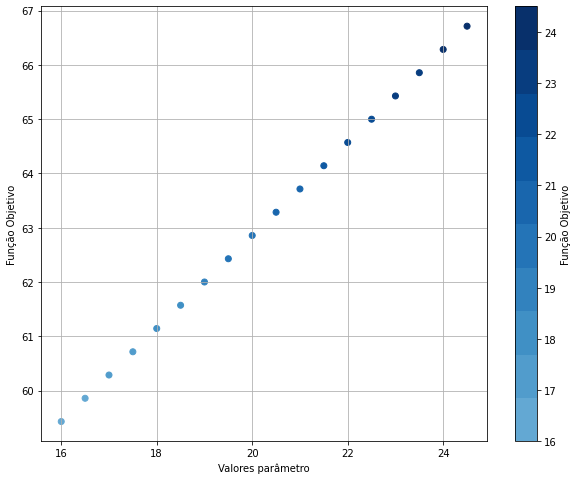

In [7]:
f_obj, param = [], []

for i in np.arange(16,25,0.5):
    f_objetivo = [-20, -i] 
    result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                        bounds=intervalo, method="simplex")
    f_obj.append(result.fun*(-1))
    param.append(i)

plot_raizes(f_obj, param)

Suponha que se deseje aumentar lucro, a partir do aumento o preço dos produtos $x_1$ e $x_2$. 

Podemos verificar o aumento do lucro a medida em que se aumenta o valor das variáveis $x_1$ e $x_2$, utilizando o código e o gráfico abaixo:

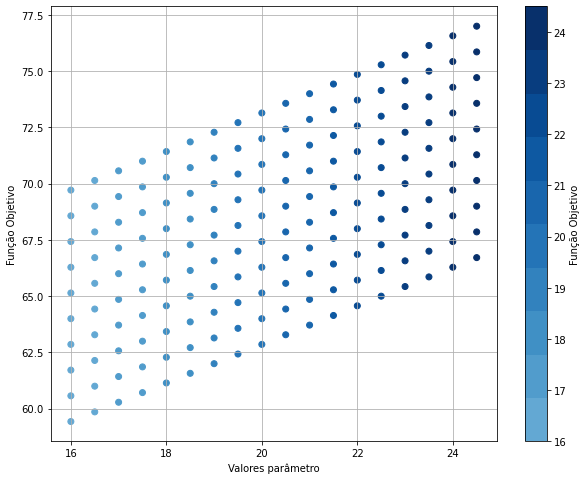

In [8]:
f_obj, param = [], []

for i in np.arange(16,25,0.5):
    for j in np.arange(20, 25, 0.5):
        f_objetivo = [-j, -i] 
        result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                            bounds=intervalo, method="simplex")
        f_obj.append(result.fun*(-1))
        param.append(i)

plot_raizes(f_obj, param)

Podemos ver, pelo gráfico que o aumento do produto $x_1$, para um mesmo valor de $x_2$ corresponde às linhas verticais sobre o ponto. 

O valor da função objetivo irá aumentar para cada uma das linhas segundo a parametrização indicada.

#### Análise de alteração dos parâmetros (restrições *b*)

Suponha agora o desejo de diminuir as restrições, por exemplo, com a compra de um maquinário novo, mais eficiente.

Podemos verificar o aumento do lucro, para a função objetivo original, a medida em que se aumenta o valor máximo da primeira restrição.

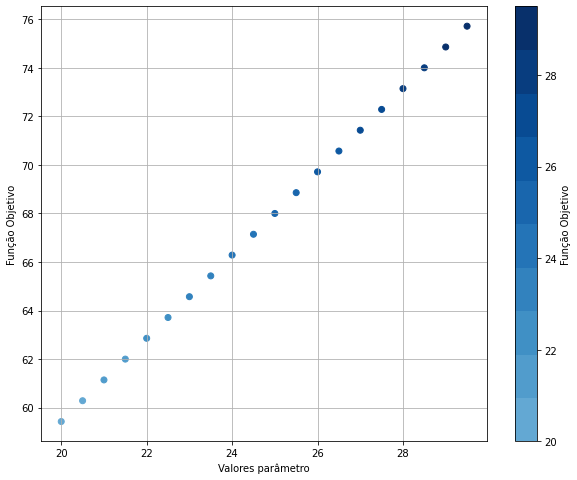

In [9]:
f_objetivo = [-20, -16] 
f_obj, param = [], []

for i in np.arange(20,30,0.5):
    b_ineq = [i, 4, 1] #restrições 1, 2 e 3 (restrição 1 variável)
    
    result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                        bounds=intervalo, method="simplex")

    f_obj.append(result.fun*(-1))
    param.append(i)

plot_raizes(f_obj, param)

Observe que o resultado aumenta quando eu possibilito reduzo a restrição de produtividade.

No exemplo a seguir, iremos verificar a alteração na mesma variável, em um intervalo diferente. 

Suponha que, até então, a produção estava programada para ser feita em uma máquina $y$, de eficiência intermediária. No entanto, o responsável pela produção, planeja avaliar o lucro em uma máquina menos eficiente e outra máquina mais eficiente.

A primeira restrição irá variar em um intervalo maior, para indicar essas três possíveis máquinas.

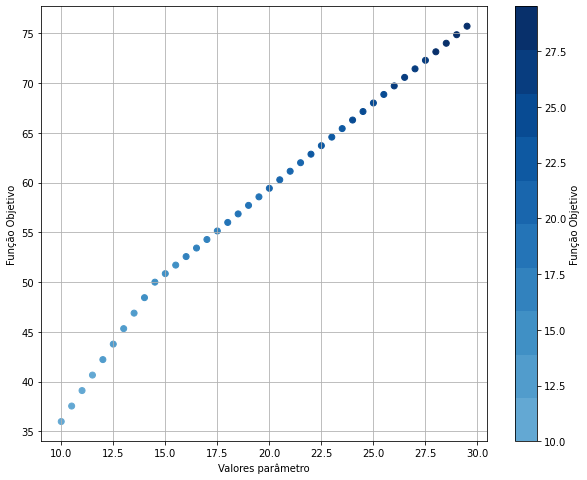

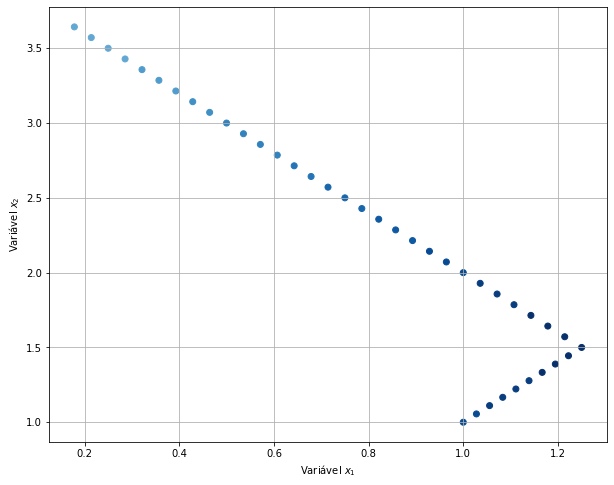

In [10]:
f_obj, param = [], []
x0, x1 = [], []

for i in np.arange(10,30,0.5):
    b_ineq = [i, 4, 1] #restrições 1, 2 e 3 (restrição 1 variável)
    
    result = opt.linprog(c=f_objetivo, A_ub=A_ineq, b_ub=b_ineq, 
                        bounds=intervalo, method="simplex")

    f_obj.append(result.fun*(-1))
    param.append(i)

    x0.append(result.x[0])
    x1.append(result.x[1])

plot_raizes(f_obj, param)
plot_raizes(x0, x1, 'Variável $x_1$', 'Variável $x_2$')

Observe que a curva possui uma alteração de inclinação próxima a 15 unidades, com menor crescimento, indicando que o lucro a partir desse ponto é reduzido em relação ao obtido anteriormente (possivelmente devido a outros fatores).

Observe também a correlação entre as variáveis $x_1$ e $x_2$. Após um determinado valor (1.5) há alteração de correlação, indicando substituição do melhor item a ser produzido para o lucro máximo.

No começo do gŕafico, há aumento da produção dos itens $x_1$ e $x_2$ ao mesmo tempo.

Depois de um determinado valor (1.5), há aumento apenas da produção do item $x_2$ e decrescimento da produção do item $x_1$.